In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

import math

from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
from numpy import median

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [69]:
dados_adv = pd.read_csv('Advertising.csv', index_col=0)
X = dados_adv.loc[:,['TV','radio','newspaper']]
y = dados_adv.loc[:,['sales']]

In [70]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

## Regressão Linear

In [71]:
linear = LinearRegression().fit(X_train,y_train)
r2_linear = r2_score(y_test,linear.predict(X_test))
r2_linear_treino = r2_score(y_train,linear.predict(X_train))

print(linear.coef_)
print("Scores R^2 Treino:")
print("linear: "+str(r2_linear_treino))


print("Scores R^2 Teste:")
print("linear: "+str(r2_linear))

print(mean_squared_error(y_test,linear.predict(X_test))) 

[[0.04471367 0.18303312 0.00443013]]
Scores R^2 Treino:
linear: 0.8792926617864103
Scores R^2 Teste:
linear: 0.9133071815302057
2.324964069935425


### Método Ridge
#### Alpha=0 regressão linear comum

In [72]:
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train) 

r2_linear = r2_score(y_test,linear.predict(X_test))
r2_linear_treino = r2_score(y_train,linear.predict(X_train))
print(linear.coef_)
print("Scores R^2 Treino:")
print("linear: "+str(r2_linear_treino))


print("Scores R^2 Teste:")
print("linear: "+str(r2_linear))
print(mean_squared_error(y_test,linear.predict(X_test))) 

[[0.04471367 0.18303312 0.00443013]]
Scores R^2 Treino:
linear: 0.8792926617864103
Scores R^2 Teste:
linear: 0.9133071815302057
2.324964069935425


In [ ]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE


### Método Ridge
#### Utilizando diferentes valores de Alpha
#### A cada novo valor de Alpha, os valores dos parâmetros da função de regressão se aproxima de zero

In [137]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
print(alphas.shape)
print(alphas[1])
print(alphas[99])


(100,)
3782316637.773145
0.005


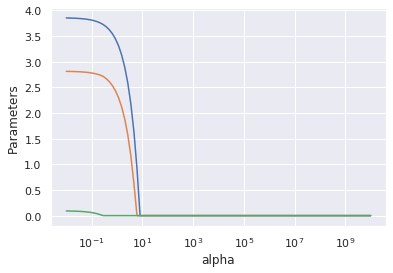

In [168]:
ridge = Ridge(normalize = True)
MSEs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train) 
    MSEs.append(mean_squared_error(y_test,ridge.predict(X_test)))
    
np.shape(coefs)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Parameters')

plt.show()

#### Comparando MSE com diferentes valores de Alpha

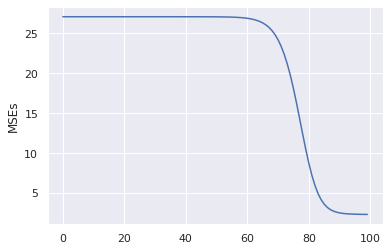

In [169]:
#plt.plot(alphas,MSEs)
plt.plot(MSEs)
plt.ylabel('MSEs')

plt.show()

### Modelo com um alpha específico que apresentou valor baixo de MSE

In [174]:
ridge = Ridge(alpha = alphas[90], normalize = True)
coefs = []

ridge.fit(X_train, y_train) 
coefs.append(ridge.coef_)
print(mean_squared_error(y_test,ridge.predict(X_test))) 
    
print(coefs)

2.5292980784303998
[array([[0.04216384, 0.17152332, 0.0074898 ]])]


#### Modelo com um alpha específico que apresentou valor baixo de MSE
#### Coeficientes são diferentes dos coeficientes da regressão linear

In [173]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(ridge2.coef_) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

[[0.0091489  0.03774553 0.00991201]]
17.969828893654377


### RidgeCV
#### Implementa busca por um alpha por meio de um critério de avaliação (score)
#### Documentação dos critérios de avaliação: https://scikit-learn.org/stable/modules/model_evaluation.html

In [175]:
ridgecv = RidgeCV(alphas = alphas )

#ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_absolute_error', normalize = True)

ridgecv.fit(X_train, y_train)
ridgecv.alpha_
print(ridgecv.coef_) # Print coefficients
print(mean_squared_error(y_test, ridgecv.predict(X_test)))          # Calculate the test MSE

[[0.04442543 0.18171339 0.00480133]]
2.340863883576664


#### Método Lasso
#### Max_iter - número máximo de iterações

Text(0, 0.5, 'weights')

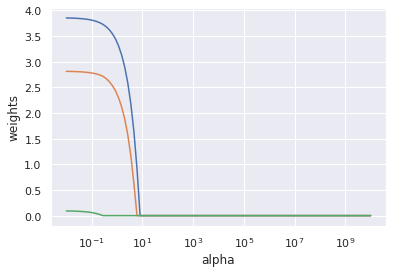

In [176]:
#lasso = Lasso(max_iter = 10000, normalize = True)
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [180]:
#lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv = LassoCV(alphas = alphas)#, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))
print(lasso.coef_)

2.332570460030333
[0.04462111 0.17943197 0.0031874 ]


/home/silvio/.conda/envs/trackml6/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/silvio/.conda/envs/trackml6/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### Regularização para Árvore

In [183]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
r2_tree = r2_score(y_test,tree.predict(X_test))
r2_tree_treino = r2_score(y_train,tree.predict(X_train))

print("Scores R^2 Treino:")
print("tree: "+str(r2_tree_treino))


print("Scores R^2 Teste:")
print("tree: "+str(r2_tree))

print(mean_squared_error(y_test,tree.predict(X_test))) 

Scores R^2 Treino:
tree: 1.0
Scores R^2 Teste:
tree: 0.9306372158594303
1.8602


1.9857000000000002
1.5778


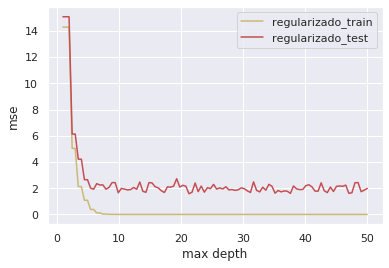

In [194]:
depth_test =  np.linspace(1., 50., num=100)

erros_train = []
erros_test = []
for depth in depth_test:
    #modelo_regularizado =  DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train.values.ravel())
    modelo_regularizado =  DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    y_pred = modelo_regularizado.predict(X_test)
    erros_train.append(mean_squared_error(y_train, modelo_regularizado.predict(X_train)))
    erros_test.append(mean_squared_error(y_test, y_pred))
    lastMSE=mean_squared_error(y_test, y_pred)

print(lastMSE)
X_new = np.array(erros_test)

print(np.amin(X_new))
plt.plot(depth_test, erros_train,color='y',label='regularizado_train')
plt.plot(depth_test, erros_test,color='r',label='regularizado_test')    


plt.xlabel('max depth')
plt.ylabel('mse')
plt.legend()
